<a href="https://colab.research.google.com/github/carlosQuin964/TalentoTech_CarlosQ/blob/main/An%C3%A1lisis_Datos_Abiertos_ICFES_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pyodbc
import warnings
import sqlite3

In [8]:
try:
    # Leer el archivo CSV ubicado en la ruta especificada y asigna los datos a la variable df_resultados
    df_acumulado_saber_11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/acumulado_saber_11.csv')

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("El dataset se cargó exitosamente")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileExistsError as e:

    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se puede encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as e:

    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error inesperado: {e}")

El dataset se cargó exitosamente


In [9]:
# Se crea un DataFrame nuevo, utilizando los datos existentes del dataset
df_acumulado_saber_11 = pd.DataFrame(df_acumulado_saber_11)

# Consulta y validación de la cantidad de filas y columnas del dataframe
num_rows, num_cols = df_acumulado_saber_11.shape

# Imprimir mensaje y valores de salidas del dataframe
print(f'El Dataframe, tiene {num_rows} filas y {num_cols} columnas.')

El Dataframe, tiene 1086317 filas y 40 columnas.


In [10]:
# La función sample, devuelve la cantidad aleatorias de filas/registros solicitada del dataframe
df_acumulado_saber_11.sample(10)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,...,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_PRIVADO_LIBERTAD,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
17229,TI,COLOMBIA,F,24/12/2000,20181,SB11201810005705,COLOMBIA,No,VALLE,CALI,...,TÉCNICO,URBANO,MAÑANA,N,53,26,40,36,27.0,189
1052564,TI,COLOMBIA,F,07/09/2004 12:00:00 AM,20204,SB11202040077619,COLOMBIA,No,ANTIOQUIA,MEDELLÍN,...,ACADÉMICO,URBANO,COMPLETA,N,70,63,65,62,77.0,330
917611,CC,COLOMBIA,F,11/07/1997 12:00:00 AM,20204,SB11202040376954,COLOMBIA,No,CUNDINAMARCA,SOACHA,...,ACADÉMICO,URBANO,SABATINA,N,43,33,37,44,39.0,196
359228,TI,COLOMBIA,M,12/24/2001 12:00:00 AM,20194,SB11201940299090,COLOMBIA,No,BOLIVAR,CARTAGENA DE INDIAS,...,TÉCNICO/ACADÉMICO,URBANO,MAÑANA,N,51,47,49,34,54.0,230
414235,CC,COLOMBIA,M,08/15/1998 12:00:00 AM,20194,SB11201940631693,COLOMBIA,No,VALLE,CALIMA,...,TÉCNICO,URBANO,SABATINA,N,43,52,51,49,42.0,241
991827,TI,COLOMBIA,M,03/03/2004 12:00:00 AM,20204,SB11202040315368,COLOMBIA,No,BOGOTÁ,BOGOTÁ D.C.,...,ACADÉMICO,URBANO,UNICA,N,62,58,49,62,60.0,290
154954,CC,COLOMBIA,M,10/05/2000 12:00:00 AM,20194,SB11201940212794,COLOMBIA,No,HUILA,GARZÓN,...,ACADÉMICO,URBANO,SABATINA,N,38,45,45,45,41.0,215
1025887,TI,COLOMBIA,F,02/11/2003 12:00:00 AM,20204,SB11202040442281,COLOMBIA,No,VALLE,CALI,...,TÉCNICO/ACADÉMICO,URBANO,MAÑANA,N,55,55,54,50,46.0,265
482163,TI,COLOMBIA,M,06/23/2003 12:00:00 AM,20194,SB11201940589654,COLOMBIA,No,ATLANTICO,MALAMBO,...,ACADÉMICO,URBANO,SABATINA,N,37,57,38,35,55.0,214
834907,TI,COLOMBIA,F,06/14/2003 12:00:00 AM,20204,SB11202040383738,COLOMBIA,No,CORDOBA,PUERTO LIBERTADOR,...,ACADÉMICO,URBANO,MAÑANA,N,45,40,39,36,42.0,201


In [11]:
df_acumulado_saber_11['ESTU_DEPTO_RESIDE'].value_counts()

,count
ESTU_DEPTO_RESIDE,
BOGOTÁ,164459
ANTIOQUIA,146584
VALLE,88016
CUNDINAMARCA,71566
ATLANTICO,62113
BOLIVAR,49838
SANTANDER,49742
CORDOBA,39570
NARIÑO,33438


In [12]:
# La función columns, devuelve el nombre de las columnas del dataframe
df_acumulado_saber_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086317 entries, 0 to 1086316
Data columns (total 40 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ESTU_TIPODOCUMENTO            1086317 non-null  object 
 1   ESTU_NACIONALIDAD             1086317 non-null  object 
 2   ESTU_GENERO                   1086308 non-null  object 
 3   ESTU_FECHANACIMIENTO          1086315 non-null  object 
 4   PERIODO                       1086317 non-null  int64  
 5   ESTU_CONSECUTIVO              1086317 non-null  object 
 6   ESTU_PAIS_RESIDE              1086317 non-null  object 
 7   ESTU_TIENEETNIA               1082560 non-null  object 
 8   ESTU_DEPTO_RESIDE             1085174 non-null  object 
 9   ESTU_MCPIO_RESIDE             1085174 non-null  object 
 10  FAMI_ESTRATOVIVIENDA          1067781 non-null  object 
 11  FAMI_PERSONASHOGAR            1061274 non-null  object 
 12  FAMI_CUARTOSHOGAR           

In [13]:
# Obtener información general del conjunto de datos

df_acumulado_saber_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086317 entries, 0 to 1086316
Data columns (total 40 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ESTU_TIPODOCUMENTO            1086317 non-null  object 
 1   ESTU_NACIONALIDAD             1086317 non-null  object 
 2   ESTU_GENERO                   1086308 non-null  object 
 3   ESTU_FECHANACIMIENTO          1086315 non-null  object 
 4   PERIODO                       1086317 non-null  int64  
 5   ESTU_CONSECUTIVO              1086317 non-null  object 
 6   ESTU_PAIS_RESIDE              1086317 non-null  object 
 7   ESTU_TIENEETNIA               1082560 non-null  object 
 8   ESTU_DEPTO_RESIDE             1085174 non-null  object 
 9   ESTU_MCPIO_RESIDE             1085174 non-null  object 
 10  FAMI_ESTRATOVIVIENDA          1067781 non-null  object 
 11  FAMI_PERSONASHOGAR            1061274 non-null  object 
 12  FAMI_CUARTOSHOGAR           

In [14]:
# Descripción estadística de las variables numéricas
df_acumulado_saber_11.describe()

,PERIODO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,1.086317e+06,1.086317e+06,1.086317e+06,1.086317e+06,1.086317e+06,1.085928e+06,1.086317e+06
mean,2.019851e+04,5.238752e+01,5.102646e+01,4.848017e+01,4.746889e+01,4.817472e+01,2.485626e+02
std,5.469084e+00,1.047043e+01,1.198036e+01,1.081123e+01,1.224824e+01,1.254123e+01,5.107014e+01
min,2.018100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.019400e+04,4.500000e+01,4.200000e+01,4.000000e+01,3.800000e+01,3.900000e+01,2.100000e+02
50%,2.019400e+04,5.300000e+01,5.100000e+01,4.800000e+01,4.700000e+01,4.600000e+01,2.450000e+02
75%,2.020400e+04,6.000000e+01,5.900000e+01,5.600000e+01,5.600000e+01,5.500000e+01,2.840000e+02
max,2.020400e+04,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,5.000000e+02


In [15]:
# Descripción estadística de las variables numéricas sin notación científica

# Se configura la forma en que los números flotantes se muestran al imprimir un DataFrame en pandas.
# Se define función lambda que toma un número x y devuelve ese número formateado con 1 decimal.
pd.set_option('display.float_format', lambda x: '%.1f' % x)

df_acumulado_saber_11.describe()

,PERIODO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,1086317.0,1086317.0,1086317.0,1086317.0,1086317.0,1085928.0,1086317.0
mean,20198.5,52.4,51.0,48.5,47.5,48.2,248.6
std,5.5,10.5,12.0,10.8,12.2,12.5,51.1
min,20181.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,20194.0,45.0,42.0,40.0,38.0,39.0,210.0
50%,20194.0,53.0,51.0,48.0,47.0,46.0,245.0
75%,20204.0,60.0,59.0,56.0,56.0,55.0,284.0
max,20204.0,100.0,100.0,100.0,100.0,100.0,500.0


In [16]:
# Descripción de las variables categóricas

df_acumulado_saber_11.describe(include=['object'])

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,...,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_PRIVADO_LIBERTAD
count,1086317,1086317,1086308,1086315,1086317,1086317,1082560,1085174,1085174,1067781,...,1067532,1051705,1086317,1086317,1086317,1000695,1057464,1086317,1086317,1086317
unique,13,57,3,20993,1086317,57,3,36,1034,8,...,6,5,10313,3,2,3,5,2,6,2
top,TI,COLOMBIA,F,01/01/1900 12:00:00 AM,SB11201810007354,COLOMBIA,No,BOGOTÁ,BOGOTÁ D.C.,Estrato 2,...,0,No,INSTITUCION EDUCATIVA FRANCISCO JOSE DE CALDAS,MIXTO,OFICIAL,N,ACADÉMICO,URBANO,MAÑANA,N
freq,886061,1081623,589970,1839,1,1081623,1010036,164459,169862,376285,...,672318,726749,2057,1049017,808491,892455,570630,913555,468577,1086029


In [17]:
# Identificar valores únicos por columna
print("\nValores únicos por columna:")
for column in df_acumulado_saber_11.columns:
    unique_values = df_acumulado_saber_11[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos):\n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("...")


Valores únicos por columna:

ESTU_TIPODOCUMENTO (13 valores únicos):
['CC' 'TI' 'CR' 'CE' 'PE' 'PC' 'RC' 'PEP' 'NES' 'CCB']
...

ESTU_NACIONALIDAD (57 valores únicos):
['COLOMBIA' 'ESTADOS UNIDOS' 'BRASIL' 'PANAMÁ' 'VENEZUELA' 'ECUADOR'
 'NICARAGUA' 'ESPAÑA' 'ARGENTINA' 'MÉXICO']
...

ESTU_GENERO (4 valores únicos):
['F' 'M' '-' nan]

ESTU_FECHANACIMIENTO (20994 valores únicos):
['29/09/1999' '19/03/2001' '31/07/2000' '20/01/2002' '23/10/2001'
 '20/04/2001' '05/04/2000' '05/11/2001' '03/11/2000' '23/09/1999']
...

PERIODO (4 valores únicos):
[20181 20194 20201 20204]

ESTU_CONSECUTIVO (1086317 valores únicos):
['SB11201810007354' 'SB11201810018765' 'SB11201810028523'
 'SB11201810003574' 'SB11201810024346' 'SB11201810006862'
 'SB11201810017023' 'SB11201810048390' 'SB11201810010098'
 'SB11201810012063']
...

ESTU_PAIS_RESIDE (57 valores únicos):
['COLOMBIA' 'ESTADOS UNIDOS' 'BRASIL' 'PANAMÁ' 'VENEZUELA' 'ECUADOR'
 'NICARAGUA' 'ESPAÑA' 'ARGENTINA' 'MÉXICO']
...

ESTU_TIENEETNIA (4 valore

<function matplotlib.pyplot.show(close=None, block=None)>

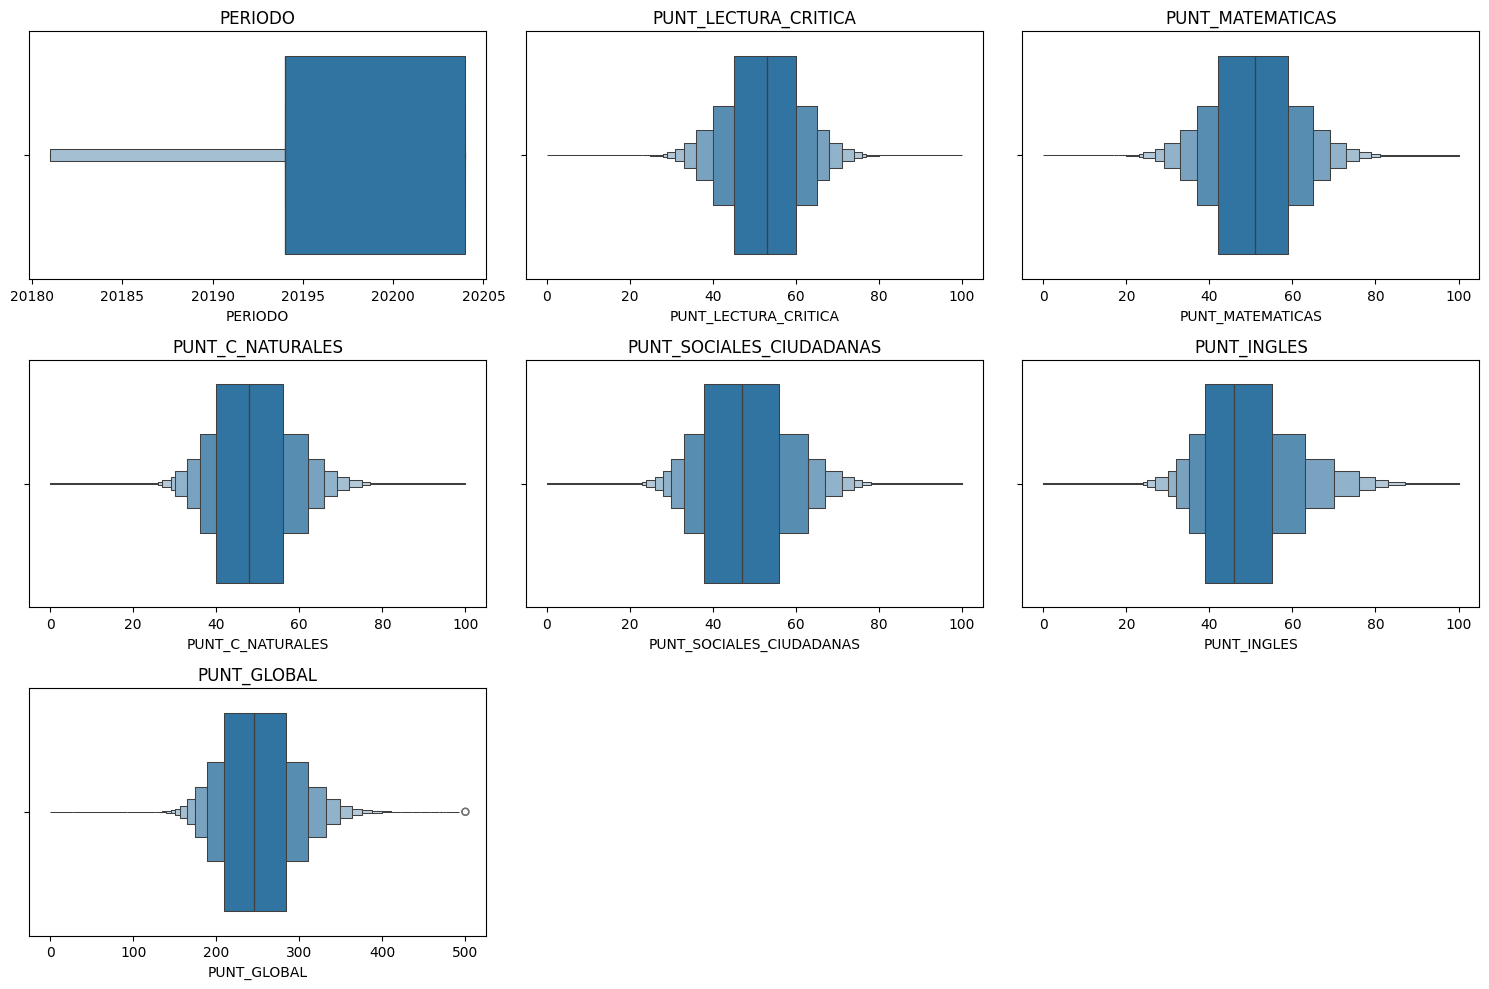

In [18]:
numeric_cols = df_acumulado_saber_11.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.boxenplot(data=df_acumulado_saber_11, x=col)
    plt.title(col)

plt.tight_layout()
plt.show

In [19]:
# Análisis de valores faltantes por columna
datos_faltantes = df_acumulado_saber_11.isnull().sum()
porcentaje_faltas = (df_acumulado_saber_11.isnull().sum() / len(df_acumulado_saber_11)) * 100

faltantes_df = pd.DataFrame({
    'Valores faltantes': datos_faltantes,
    'Porcentaje (%)' : porcentaje_faltas
})

# Ordernar de manera descendente por %
faltantes_df = faltantes_df.sort_values(by='Porcentaje (%)', ascending=False)
faltantes_df

,Valores faltantes,Porcentaje (%)
COLE_BILINGUE,85622,7.9
ESTU_DEDICACIONINTERNET,46477,4.3
FAMI_EDUCACIONMADRE,35989,3.3
ESTU_TIPOREMUNERACION,34612,3.2
FAMI_TIENECOMPUTADOR,29801,2.7
FAMI_TRABAJOLABORPADRE,29278,2.7
COLE_CARACTER,28853,2.7
FAMI_TIENECONSOLAVIDEOJUEGOS,26654,2.5
FAMI_TRABAJOLABORMADRE,26528,2.4
FAMI_SITUACIONECONOMICA,26023,2.4


In [20]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_TIPODOCUMENTO'
df_acumulado_saber_11['ESTU_TIPODOCUMENTO'].value_counts()

,count
ESTU_TIPODOCUMENTO,
TI,886061
CC,183034
CR,11470
CE,2527
NES,2288
PEP,680
PE,200
RC,33
PC,15


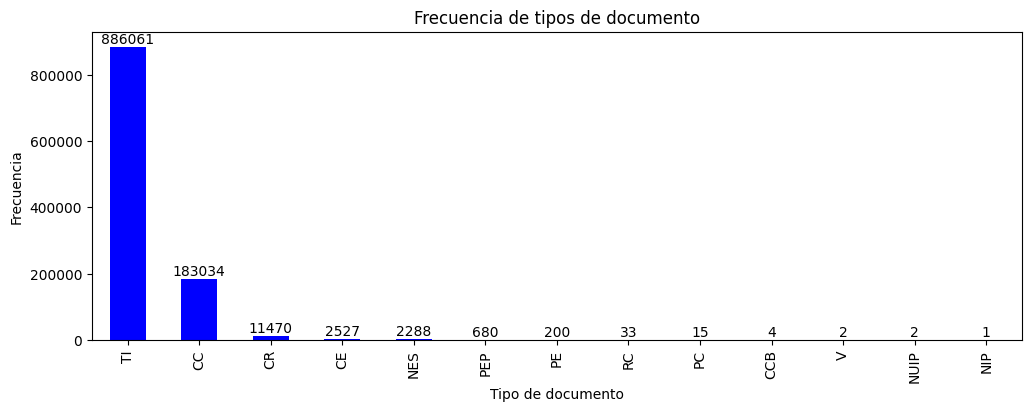

In [21]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_TIPODOCUMENTO'
tipo_documento_counts = df_acumulado_saber_11['ESTU_TIPODOCUMENTO'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(12, 4))
ax = tipo_documento_counts.plot(kind='bar', color = 'blue')

# Añadir la cantidad en cada barra
for i, v in enumerate(tipo_documento_counts):
    ax.text(i, v + 1000, str(v), ha = 'center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Frecuencia de tipos de documento')
plt.xlabel('Tipo de documento')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

In [22]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_NACIONALIDAD'
df_acumulado_saber_11['ESTU_NACIONALIDAD'].value_counts()

,count
ESTU_NACIONALIDAD,
COLOMBIA,1081623
VENEZUELA,4108
ESTADOS UNIDOS,149
ESPAÑA,92
ECUADOR,79
ARGENTINA,21
BRASIL,20
MÉXICO,20
PERÚ,17


In [23]:
import unicodedata

# Eliminar tildes usando unicodedata
df_acumulado_saber_11['ESTU_NACIONALIDAD'] = df_acumulado_saber_11['ESTU_NACIONALIDAD'].apply(
    lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8')
)

# Verificar los cambios
print(df_acumulado_saber_11['ESTU_NACIONALIDAD'].value_counts())

ESTU_NACIONALIDAD
COLOMBIA                           1081623
VENEZUELA                             4108
ESTADOS UNIDOS                         149
ESPANA                                  92
ECUADOR                                 79
ARGENTINA                               21
BRASIL                                  20
MEXICO                                  20
PERU                                    17
CUBA                                    16
CHILE                                   14
COSTA RICA                              13
ITALIA                                  11
PANAMA                                   9
FRANCIA                                  9
ALEMANIA                                 9
BOLIVIA                                  8
VANUATU                                  8
REPUBLICA DOMINICANA                     7
EL SALVADOR                              7
HONDURAS                                 6
NICARAGUA                                5
PAISES BAJOS - HOLANDA              

In [24]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_NACIONALIDAD'
df_acumulado_saber_11['ESTU_GENERO'].value_counts()

,count
ESTU_GENERO,
F,589970
M,496216
-,122


In [25]:
# reemplazar valores "-"
df_acumulado_saber_11['ESTU_GENERO'] = df_acumulado_saber_11['ESTU_GENERO'].replace('-','No_informa')

# contar registros de la columna 'ESTU_GENERO'
df_acumulado_saber_11['ESTU_GENERO'].value_counts()

,count
ESTU_GENERO,
F,589970
M,496216
No_informa,122


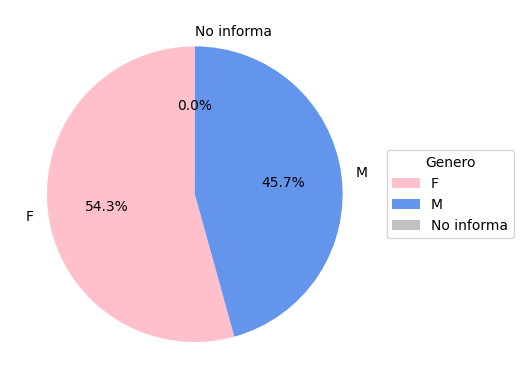

In [26]:
# Cantidad de registros por el tipo de genero

# generar conteo de registros por valor único en la columna ESTU_GENERO
df_genero = df_acumulado_saber_11['ESTU_GENERO'].value_counts()

# establecer etiquetas y colores
etiquetas = ['F','M','No informa']
colores = ['#FFC0CB', '#6495ED', '#C0C0C0']

# crear gráfico de torta
plt.pie(df_genero, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# agregar leyenda
plt.legend(title='Genero', loc = 'center left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show()

In [27]:
# contar registros de la columna 'ESTU_FECHANACIENTO'

df_acumulado_saber_11['ESTU_FECHANACIMIENTO'].value_counts().sort_values(ascending=False)

,count
ESTU_FECHANACIMIENTO,
01/01/1900 12:00:00 AM,1839
03/03/2003 12:00:00 AM,1297
01/03/2003 12:00:00 AM,1273
09/13/2002 12:00:00 AM,1259
09/17/2002 12:00:00 AM,1240
...,...
0002-04-20T00:00:00.000,1
06/03/1986 12:00:00 AM,1
0004-05-20T00:00:00.000,1


In [28]:
# Es posible que lleguemos a evidenciar un error "OutOfBoundsDatetime: Out of bounds nanosecond timestamp" cuano ejecutemos el cambio de tipo de dato, indica que en la columna
# de fechas se encuentran valores que no se pueden representar correctamente como objetos de fecha y hora de pandas.

# Para solucionar ese error, debemos identificar los valores problemáticos y limpiarlos antes de convertir la columna al formato de fecha y hora de pandas.
# Una forma de hacerlo es mediante la función "to_datetime()" de pandas, pasando el argumento "errors='coerce'". De esta forma, cualquier valor que no pueda convertirse
# correctamente será reemplazado por "NaT" (valores faltantes en pandas).

# limpiar valores problemáticos
#df_acumulado_saber_11['ESTU_FECHANACIMIENTO'] = df_acumulado_saber_11['ESTU_FECHANACIMIENTO'].str.replace('\r', '')
#df_acumulado_saber_11['ESTU_FECHANACIMIENTO'] = df_acumulado_saber_11['ESTU_FECHANACIMIENTO'].str.replace('\n', '')

# convertir columna 'ESTU_FECHANACIMIENTO' al formato de fecha y hora de pandas
df_acumulado_saber_11['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df_acumulado_saber_11['ESTU_FECHANACIMIENTO'], errors='coerce')

# obtener solo el año de nacimiento
df_acumulado_saber_11['ANIO_NACIMIENTO'] = df_acumulado_saber_11['ESTU_FECHANACIMIENTO'].dt.year

# Si deseamos, tenemos la opción de eliminar o no columnas innecesarias, en este caso la columna 'ESTU_FECHANACIMIENTO' será reemplazada por 'ANIO_NACIMIENTO'
df_acumulado_saber_11 = df_acumulado_saber_11.drop('ESTU_FECHANACIMIENTO', axis=1)

# mostrar resultados
df_acumulado_saber_11.head(3)

<ipython-input-28-2534831bbcfe>:13: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_acumulado_saber_11['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df_acumulado_saber_11['ESTU_FECHANACIMIENTO'], errors='coerce')


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,PERIODO,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,...,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_PRIVADO_LIBERTAD,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ANIO_NACIMIENTO
0,CC,COLOMBIA,F,20181,SB11201810007354,COLOMBIA,No,BOGOTA,BOGOTÁ D.C.,Estrato 6,...,URBANO,COMPLETA,N,71,65,69,63,90.0,344,1999.0
1,TI,COLOMBIA,M,20181,SB11201810018765,COLOMBIA,No,VALLE,CALI,Estrato 5,...,URBANO,COMPLETA,N,75,77,100,81,86.0,417,2001.0
2,TI,COLOMBIA,M,20181,SB11201810028523,COLOMBIA,No,VALLE,CALI,Estrato 1,...,RURAL,SABATINA,N,42,27,29,36,29.0,166,2000.0


In [29]:
df_acumulado_saber_11['ANIO_NACIMIENTO'].value_counts().sort_values(ascending=False)

,count
ANIO_NACIMIENTO,
2000.0,6865
2001.0,5639
1999.0,3448
1998.0,914
2002.0,864
...,...
1955.0,2
1942.0,1
1949.0,1


In [30]:
# contar registros de la columna 'ANIO_NACIMIENTO'
conteo_por_anio = df_acumulado_saber_11['ANIO_NACIMIENTO'].value_counts()

# filtrar años de interés, entre 2009 y 2020
filtro = (conteo_por_anio.index >= 2009) & (conteo_por_anio.index <= 2020)
conteo_por_anio_filtrado = conteo_por_anio.loc[filtro]

# Mostrar resultados
print(conteo_por_anio_filtrado)
plt.show()

print("Entre los años 2009 y 2020, hay un total de:", conteo_por_anio_filtrado.sum())

ANIO_NACIMIENTO
2017.0    21
2009.0     7
2011.0     4
2010.0     4
2012.0     2
Name: count, dtype: int64
Entre los años 2009 y 2020, hay un total de: 38


In [31]:
# Identificar los índices de los registros a eliminar
indices_eliminar = df_acumulado_saber_11[(df_acumulado_saber_11['ANIO_NACIMIENTO']
                                          >= 2009) & (df_acumulado_saber_11['ANIO_NACIMIENTO']<=2009)].index

# Eliminar los registros
df_resultados = df_acumulado_saber_11.drop(indices_eliminar)

print("Se eliminaron",conteo_por_anio_filtrado.sum(),'resgistros que pertenecen a los nacidos entre 2009 y 2020')

Se eliminaron 38 resgistros que pertenecen a los nacidos entre 2009 y 2020


In [32]:
# Conteo de registros con NaN, null o vacíos en la columna 'ANIO_NACIMIENTO'
df_acumulado_saber_11['ANIO_NACIMIENTO'].isna().sum()

1066521

In [33]:
# Calcular el número de registros con valores vacíos en ANIO_NACIMIENTO por grupo
vacios_por_grupo = df_acumulado_saber_11.groupby('ESTU_TIPODOCUMENTO')['ANIO_NACIMIENTO'].apply(lambda x: x.isna().sum())

# Ordenar de mayor a menor
vacios_grupo_sorted = vacios_por_grupo.sort_values(ascending=False)

# Imprimir cantidad de valores vacíos ordenados de mayor a menor
for grupo in vacios_grupo_sorted.index:
    print(f"Grupo: {grupo}")
    print(f"Cantidad de valores vacíos: {vacios_grupo_sorted.loc[grupo]}")
    print('-------------------------------')

Grupo: TI
Cantidad de valores vacíos: 871802
-------------------------------
Grupo: CC
Cantidad de valores vacíos: 178022
-------------------------------
Grupo: CR
Cantidad de valores vacíos: 11108
-------------------------------
Grupo: CE
Cantidad de valores vacíos: 2402
-------------------------------
Grupo: NES
Cantidad de valores vacíos: 2288
-------------------------------
Grupo: PEP
Cantidad de valores vacíos: 680
-------------------------------
Grupo: PE
Cantidad de valores vacíos: 168
-------------------------------
Grupo: RC
Cantidad de valores vacíos: 32
-------------------------------
Grupo: PC
Cantidad de valores vacíos: 10
-------------------------------
Grupo: CCB
Cantidad de valores vacíos: 4
-------------------------------
Grupo: NUIP
Cantidad de valores vacíos: 2
-------------------------------
Grupo: V
Cantidad de valores vacíos: 2
-------------------------------
Grupo: NIP
Cantidad de valores vacíos: 1
-------------------------------


In [34]:
# Calcular el número total de valores no nulos en ANIO_NACIMIENTO
total_no_nulos = df_acumulado_saber_11['ANIO_NACIMIENTO'].notna().sum()

# Calcular el número de registros con valores no nulos en ANIO_NACIMIENTO por grupo
no_nulos_por_grupo = df_acumulado_saber_11.groupby('ESTU_TIPODOCUMENTO')['ANIO_NACIMIENTO'].apply(lambda x: x.notna().sum())

# Calcular el porcentaje de cada grupo respecto al total de valores no nulos
porcentaje_por_grupo = (no_nulos_por_grupo / total_no_nulos) * 100

# Ordenar de mayor a menor
porcentaje_por_grupo_sorted = porcentaje_por_grupo.sort_values(ascending=False)

# Imprimir porcentaje de valores no nulos y cantidad por grupo
for grupo in porcentaje_por_grupo_sorted.index:
    print(f"Grupo: {grupo}")
    print(f"Cantidad de valores no nulos: {no_nulos_por_grupo.loc[grupo]}")
    print(f"Porcentajes sobre el total de valores no nulos: {porcentaje_por_grupo_sorted.loc[grupo]:.2f}%")
    print('-------------------------------')

Grupo: TI
Cantidad de valores no nulos: 14259
Porcentajes sobre el total de valores no nulos: 72.03%
-------------------------------
Grupo: CC
Cantidad de valores no nulos: 5012
Porcentajes sobre el total de valores no nulos: 25.32%
-------------------------------
Grupo: CR
Cantidad de valores no nulos: 362
Porcentajes sobre el total de valores no nulos: 1.83%
-------------------------------
Grupo: CE
Cantidad de valores no nulos: 125
Porcentajes sobre el total de valores no nulos: 0.63%
-------------------------------
Grupo: PE
Cantidad de valores no nulos: 32
Porcentajes sobre el total de valores no nulos: 0.16%
-------------------------------
Grupo: PC
Cantidad de valores no nulos: 5
Porcentajes sobre el total de valores no nulos: 0.03%
-------------------------------
Grupo: RC
Cantidad de valores no nulos: 1
Porcentajes sobre el total de valores no nulos: 0.01%
-------------------------------
Grupo: CCB
Cantidad de valores no nulos: 0
Porcentajes sobre el total de valores no nulos:

In [35]:
# Filtro para registros donde ESTU_TIPODOCUMENTO es igual a 'TI' y ANIO_NACIMIENTO es NaN
filtro_ti = (df_acumulado_saber_11['ESTU_TIPODOCUMENTO'] == 'TI') & (df_acumulado_saber_11['ANIO_NACIMIENTO'].isna())

# Número de registros a asignar
num_registro_ti = filtro_ti.sum()

# Distribución de asignación ajustada
distribucion = {
                2003: 0.5,
                2004: 0.5,
                2005: 0.3,
                2006: 0.2,
                2007: 0.2,
                2008: 0.2,
                }

# Ajustar las probabilidades para que sumen 1
total_probabilidad = sum(distribucion.values())
probabilidad_ajustadas = {key: value / total_probabilidad for key, value in distribucion.items() }

# Generar una lista de años basada en la distribución ajustada
anos_distribucion = np.random.choice(list(probabilidad_ajustadas.keys()), size=num_registro_ti, p=list(probabilidad_ajustadas.values()))

# Asignar los años a los registros filtrados
df_acumulado_saber_11.loc[filtro_ti, 'ANIO_NACIMIENTO'] = anos_distribucion

# Verificar los cambios
print(df_acumulado_saber_11.loc[filtro_ti, 'ANIO_NACIMIENTO'].value_counts())

ANIO_NACIMIENTO
2004.0    229706
2003.0    229512
2005.0    137693
2007.0     91794
2006.0     91630
2008.0     91467
Name: count, dtype: int64


In [36]:
# Filtro para registros donde ESTU_TIPODOCUMENTO es igual a 'CC' y ANIO_NACIMIENTO es NaN
filtro_ti = (df_acumulado_saber_11['ESTU_TIPODOCUMENTO'] == 'CC') & (df_acumulado_saber_11['ANIO_NACIMIENTO'].isna())

# Número de registros a asignar
num_registro_ti = filtro_ti.sum()

# Distribución de asignación ajustada
distribucion = {
                2002: 0.5,
                2001: 0.5,
                2000: 0.3,
                1999: 0.1,
                1998: 0.1,
                1997: 0.1,
                1996: 0.1,
                1995: 0.1,
                1994: 0.1
                }

# Ajustar las probabilidades para que sumen 1
total_probabilidad = sum(distribucion.values())
probabilidad_ajustadas = {key: value / total_probabilidad for key, value in distribucion.items() }

# Generar una lista de años basada en la distribución ajustada
anos_distribucion = np.random.choice(list(probabilidad_ajustadas.keys()), size=num_registro_ti, p=list(probabilidad_ajustadas.values()))

# Asignar los años a los registros filtrados
df_acumulado_saber_11.loc[filtro_ti, 'ANIO_NACIMIENTO'] = anos_distribucion

# Verificar los cambios
print("Distribución de años asignados a CC")
print(df_acumulado_saber_11.loc[filtro_ti, 'ANIO_NACIMIENTO'].value_counts())

Distribución de años asignados a CC
ANIO_NACIMIENTO
2001.0    47009
2002.0    46737
2000.0    28158
1999.0     9565
1996.0     9363
1998.0     9331
1994.0     9317
1995.0     9287
1997.0     9255
Name: count, dtype: int64


In [37]:
# Conteo de registros con NaN, null o vacíos en la columna 'ANIO_NACIMIENTO'
df_acumulado_saber_11['ANIO_NACIMIENTO'].isna().sum()

16697

In [38]:
# Calcular el número total de valores no nulos en ANIO_NACIMIENTO
total_no_nulos = df_acumulado_saber_11['ANIO_NACIMIENTO'].notna().sum()

# Calcular el número de registros con valores no nulos en ANIO_NACIMIENTO por grupo
no_nulos_por_grupo = df_acumulado_saber_11.groupby('ESTU_TIPODOCUMENTO')['ANIO_NACIMIENTO'].apply(lambda x: x.notna().sum())

# Calcular el porcentaje de cada grupo respecto al total de valores no nulos
porcentaje_por_grupo = (no_nulos_por_grupo / total_no_nulos) * 100

# Ordenar de mayor a menor
porcentaje_por_grupo_sorted = porcentaje_por_grupo.sort_values(ascending=False)

# Imprimir porcentaje de valores no nulos y cantidad por grupo
for grupo in porcentaje_por_grupo_sorted.index:
    print(f"Grupo: {grupo}")
    print(f"Cantidad de valores no nulos: {no_nulos_por_grupo.loc[grupo]}")
    print(f"Porcentajes sobre el total de valores no nulos: {porcentaje_por_grupo_sorted.loc[grupo]:.2f}%")
    print('-------------------------------')

Grupo: TI
Cantidad de valores no nulos: 886061
Porcentajes sobre el total de valores no nulos: 82.84%
-------------------------------
Grupo: CC
Cantidad de valores no nulos: 183034
Porcentajes sobre el total de valores no nulos: 17.11%
-------------------------------
Grupo: CR
Cantidad de valores no nulos: 362
Porcentajes sobre el total de valores no nulos: 0.03%
-------------------------------
Grupo: CE
Cantidad de valores no nulos: 125
Porcentajes sobre el total de valores no nulos: 0.01%
-------------------------------
Grupo: PE
Cantidad de valores no nulos: 32
Porcentajes sobre el total de valores no nulos: 0.00%
-------------------------------
Grupo: PC
Cantidad de valores no nulos: 5
Porcentajes sobre el total de valores no nulos: 0.00%
-------------------------------
Grupo: RC
Cantidad de valores no nulos: 1
Porcentajes sobre el total de valores no nulos: 0.00%
-------------------------------
Grupo: CCB
Cantidad de valores no nulos: 0
Porcentajes sobre el total de valores no nul

In [39]:
# Filtro para registros donde ESTU_TIPODOCUMENTO es igual a 'CC' y ANIO_NACIMIENTO es NaN
tipos_documento = ['V', 'PEP', 'NUIP', 'NIP', 'NES', 'CCB', 'RC', 'PC', 'PE', 'CE', 'CR']
filtro_ti = df_acumulado_saber_11['ESTU_TIPODOCUMENTO'].isin(tipos_documento)& df_acumulado_saber_11['ANIO_NACIMIENTO'].isna()

# Número de registros a asignar
num_registro_ti = filtro_ti.sum()

# Distribución de asignación ajustada
distribucion = {
                2006: 0.20,
                2005: 0.20,
                2004: 0.20,
                2003: 0.20,
                2002: 0.2,
                2001: 0.2,
                2000: 0.2,
                1999: 0.1,
                1998: 0.1,
                1997: 0.1,
                1996: 0.1,
                1995: 0.1,
                1994: 0.1,
                }

# Ajustar las probabilidades para que sumen 1
total_probabilidad = sum(distribucion.values())
probabilidad_ajustadas = {key: value / total_probabilidad for key, value in distribucion.items() }

# Generar una lista de años basada en la distribución ajustada
anos_distribucion = np.random.choice(list(probabilidad_ajustadas.keys()), size=num_registro_ti, p=list(probabilidad_ajustadas.values()))

# Asignar los años a los registros filtrados
df_acumulado_saber_11.loc[filtro_ti, 'ANIO_NACIMIENTO'] = anos_distribucion

# Verificar los cambios
print("Distribución de años asignados a CC")
print(df_acumulado_saber_11.loc[filtro_ti, 'ANIO_NACIMIENTO'].value_counts())

Distribución de años asignados a CC
ANIO_NACIMIENTO
2005.0    1754
2000.0    1714
2001.0    1703
2002.0    1679
2006.0    1662
2003.0    1648
2004.0    1636
1995.0     836
1994.0     834
1997.0     834
1996.0     810
1998.0     794
1999.0     793
Name: count, dtype: int64


In [40]:
# Conteo de registros con NaN, null o vacíos en la columna 'ANIO_NACIMIENTO'
df_acumulado_saber_11['ANIO_NACIMIENTO'].isna().sum()

0

In [41]:
df_acumulado_saber_11.sample(5)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,PERIODO,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,...,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_PRIVADO_LIBERTAD,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ANIO_NACIMIENTO
461491,TI,COLOMBIA,F,20194,SB11201940523441,COLOMBIA,No,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,...,URBANO,TARDE,N,33,42,41,40,50.0,199,2004.0
491182,TI,COLOMBIA,M,20194,SB11201940103454,COLOMBIA,No,BOGOTÁ,BOGOTÁ D.C.,Estrato 2,...,URBANO,TARDE,N,57,63,51,43,52.0,267,2006.0
699521,CC,COLOMBIA,F,20204,SB11202040532241,COLOMBIA,No,CASANARE,YOPAL,Estrato 2,...,URBANO,SABATINA,N,47,26,39,42,33.0,190,2000.0
55682,TI,COLOMBIA,F,20194,SB11201940029252,COLOMBIA,No,CUNDINAMARCA,SOACHA,Estrato 2,...,URBANO,COMPLETA,N,48,61,56,42,53.0,259,2004.0
506705,TI,COLOMBIA,M,20194,SB11201940563936,COLOMBIA,No,CASANARE,YOPAL,Estrato 2,...,URBANO,MAÑANA,N,57,53,62,53,52.0,280,2005.0


In [42]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.

df_tenia = df_acumulado_saber_11['ESTU_TIENEETNIA'].value_counts().reset_index()
df_tenia.columns = ['Etenia', 'Cantidad']
df_tenia

,Etenia,Cantidad
0,No,1010036
1,Si,72130
2,-,394


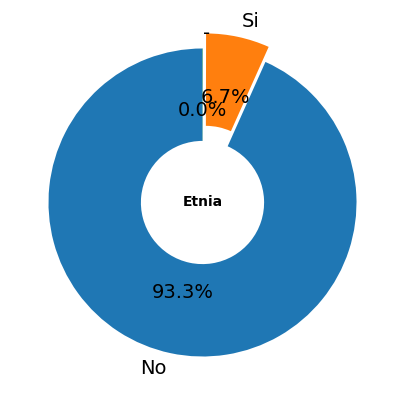

In [43]:
# generar conteo de registros por valor único en la columna ESTU_TIENEETNIA que hace referencia si pertenece o no a un tipo de etnia.
df_tenia = df_acumulado_saber_11['ESTU_TIENEETNIA'].value_counts().reset_index()
df_tenia.columns = ['Etnia', 'Cantidad']

# configurar etiquetas
labels = df_tenia['Etnia']
sizes = df_tenia['Cantidad']
explode = (0, 0.1, 0)

 # separar una porción del gráfico

# configurar la figura y el eje
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

# crear gráfico de dona
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.6})

# agregar etiqueta central
ax.text(0, 0, 'Etnia', horizontalalignment='center', verticalalignment='center', fontsize=10, fontweight='bold')

# mostrar resultados
plt.show()

In [44]:
# Los valores que estan etiquetados como "el signo menos", representan un 0.06% del total de registros, estos estan representados con el caracter "-".
# Se procederá a reemplazar en el DataFrame original ese caracter con la etiqueta de "Desconocido".

# reemplazar valores "-"
df_acumulado_saber_11['ESTU_TIENEETNIA'] = df_acumulado_saber_11['ESTU_TIENEETNIA'].replace('-','No responde')

# contar registros de la columna 'ESTU_GENERO'
df_acumulado_saber_11['ESTU_TIENEETNIA'].value_counts()

,count
ESTU_TIENEETNIA,
No,1010036
Si,72130
No responde,394


In [45]:
# generar conteo de registros por valor único en la columna ESTU_DEPTO_RESIDE que hace referencia al departamento de residencia

df_acumulado_saber_11['ESTU_DEPTO_RESIDE'].value_counts()

,count
ESTU_DEPTO_RESIDE,
BOGOTÁ,164459
ANTIOQUIA,146584
VALLE,88016
CUNDINAMARCA,71566
ATLANTICO,62113
BOLIVAR,49838
SANTANDER,49742
CORDOBA,39570
NARIÑO,33438


In [46]:
# Generar conteo de registros por valor único en la columna ESTU_MCPIO_RESIDE que hace referencia al municipio de residencia

unique_values = df_acumulado_saber_11['ESTU_MCPIO_RESIDE'].unique().tolist()
unique_values

['BOGOTÁ D.C.',
 'CALI',
 'YUMBO',
 'SOLEDAD',
 'CHÍA',
 'ENVIGADO',
 'PALMIRA',
 'BARRANQUILLA',
 'EL CERRITO',
 'PEREIRA',
 'POPAYÁN',
 'GUACARÍ',
 'MEDELLÍN',
 'GUADALAJARA DE BUGA',
 'CARTAGENA DE INDIAS',
 'EL PAUJÍL',
 'LOS PATIOS',
 'MONTERÍA',
 'LA PLATA',
 'PASTO',
 'SOACHA',
 'BELÉN DE UMBRÍA',
 'ILES',
 'MUTATÁ',
 'ANCUYÁ',
 'DUITAMA',
 'PACHO',
 'CAJICÁ',
 'GUADALUPE',
 'ARAUCA',
 'VICTORIA',
 'JAMUNDÍ',
 'ZIPAQUIRÁ',
 'MANIZALES',
 'SAN DIEGO',
 'FLORIDABLANCA',
 'RESTREPO',
 '-',
 'DAGUA',
 'INÍRIDA',
 'BUCARAMANGA',
 'PAMPLONA',
 'PUERTO TEJADA',
 'IBAGUÉ',
 'CARTAGO',
 'CANDELARIA',
 'CAICEDONIA',
 'APARTADÓ',
 'VALLEDUPAR',
 'PIEDECUESTA',
 'TENJO',
 'SANTA MARTA',
 'SAN SEBASTIÁN DE MARIQUITA',
 'MOCOA',
 'EL CARMEN DE VIBORAL',
 'GIRÓN',
 'FUSAGASUGÁ',
 'FLORIDA',
 'FUNZA',
 'PITALITO',
 'CAMPO DE LA CRUZ',
 'ARMENIA',
 'VIJES',
 'MAGANGUÉ',
 'MÁLAGA',
 'LA MESA',
 'BELLO',
 'LA CEJA',
 'NEIVA',
 'SANDONÁ',
 'VILLAVICENCIO',
 'TAME',
 'LA CUMBRE',
 'MAICAO',
 'AGUACH

In [47]:
# generar conteo de registros por valor único en la columna FAMI_ESTRATOVIVIENDAA que hace referencia al estrato de la vivienda de los estudiantes.

df_acumulado_saber_11['FAMI_ESTRATOVIVIENDA'].value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,376285
Estrato 1,315139
Estrato 3,220252
Estrato 4,55282
Sin Estrato,34575
-,34481
Estrato 5,20264
Estrato 6,11503


In [48]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
                '-'             : 'No sabe',
                'Estrato 1'     : '1',
                'Estrato 2'     : '2',
                'Estrato 3'     : '3',
                'Estrato 4'     : '4',
                'Estrato 5'     : '5',
                'Estrato 6'     : '6',
                'Sin Estrato'   : 'No sabe'
}

# Implementar la función .replace
df_acumulado_saber_11['FAMI_ESTRATOVIVIENDA'].replace(replace_dict, inplace=True)
df_acumulado_saber_11['FAMI_ESTRATOVIVIENDA'].value_counts()

<ipython-input-48-21c84734e53b>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_acumulado_saber_11['FAMI_ESTRATOVIVIENDA'].replace(replace_dict, inplace=True)


,count
FAMI_ESTRATOVIVIENDA,
2,376285
1,315139
3,220252
No sabe,69056
4,55282
5,20264
6,11503


In [49]:
df_acumulado_saber_11['FAMI_PERSONASHOGAR'].value_counts()

,count
FAMI_PERSONASHOGAR,
3 a 4,517704
5 a 6,333383
7 a 8,87376
1 a 2,80038
9 o más,34530
-,7530
Sin Respuesta,713
